<a href="https://colab.research.google.com/github/syedanida/end2end-modeling-with-Deep-Learning/blob/main/end2end_imageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import kagglehub
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import wandb

In [60]:
# Initialize WandB for experiment tracking
wandb.init(project="deep-learning-classification")

In [61]:
path = kagglehub.dataset_download("brendan45774/test-file")

# Print the path where the dataset is stored
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/brendan45774/test-file/versions/6


In [62]:
# List all files in the downloaded directory
files = os.listdir(path)
print("Files in the directory:", files)

Files in the directory: ['tested.csv']


In [63]:
dataset_df = pd.read_csv(os.path.join(path, 'tested.csv'))

# Check the first few rows of the dataset to understand its structure
print(f"First few rows of the dataset:\n{dataset_df.head()}")


First few rows of the dataset:
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [64]:
X = dataset_df.drop(columns=['Survived'])
y = dataset_df['Survived']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
from sklearn.preprocessing import LabelEncoder

# 1. Drop columns that are not useful for modeling (e.g., 'Name', 'Ticket', 'Cabin')
X = dataset_df.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])

# 2. Handle categorical variables - Encode 'Sex' and 'Embarked'
encoder = LabelEncoder()

# Encode 'Sex' (male=0, female=1)
X['Sex'] = encoder.fit_transform(X['Sex'])

# Encode 'Embarked' (S=0, C=1, Q=2) - Handle missing values as well
X['Embarked'] = X['Embarked'].fillna('S')  # Impute missing 'Embarked' values with 'S'
X['Embarked'] = encoder.fit_transform(X['Embarked'])

# 3. Handle missing values (e.g., in 'Age' and 'Fare') - Impute with the mean
X = X.fillna(X.mean())

# 4. Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Standardize the features for deep learning model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [67]:
# Build the deep learning model for classification
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification (for binary target)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
!pip install wandb

In [69]:
import wandb
import tensorflow as tf
#from wandb.keras import WandbCallback

# Initialize WandB
wandb.init(project="deep-learning-classification")

# Define and compile the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Adjust according to your problem
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model without using WandbCallback directly
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, batch_size=32)

# Log metrics manually
wandb.log({"loss": history.history['loss'], "val_loss": history.history['val_loss'], "accuracy": history.history['accuracy'], "val_accuracy": history.history['val_accuracy']})


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.5888 - loss: 0.6493 - val_accuracy: 0.9701 - val_loss: 0.5201
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9559 - loss: 0.5153 - val_accuracy: 0.9851 - val_loss: 0.4194
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9912 - loss: 0.3988 - val_accuracy: 0.9851 - val_loss: 0.3333
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 0.3024 - val_accuracy: 1.0000 - val_loss: 0.2534
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.2247 - val_accuracy: 1.0000 - val_loss: 0.1846
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.1670 - val_accuracy: 1.0000 - val_loss: 0.1278
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.1119 - val_accuracy: 1.0000 - val_loss: 0.0871
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0755 - val_accuracy: 1.0000 - val_loss: 0.0589


In [70]:
# Evaluate the model
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")  # Convert probabilities to binary labels

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Log metrics to WandB
wandb.log({"accuracy": accuracy, "precision": precision, "recall": recall, "f1_score": f1})

# Print out the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


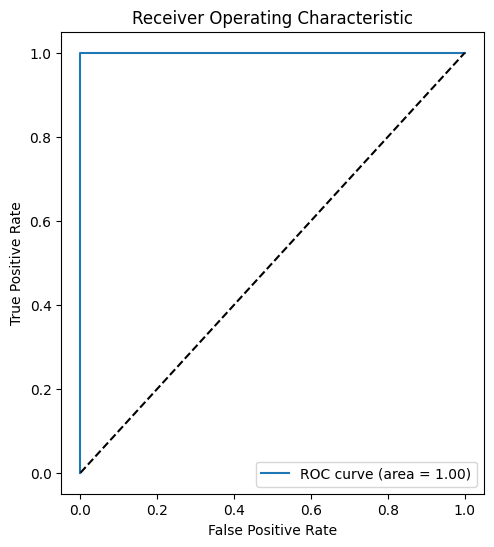

In [71]:
# Plot ROC and PR Curves
fpr, tpr, _ = roc_curve(y_test, model.predict(X_test_scaled))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


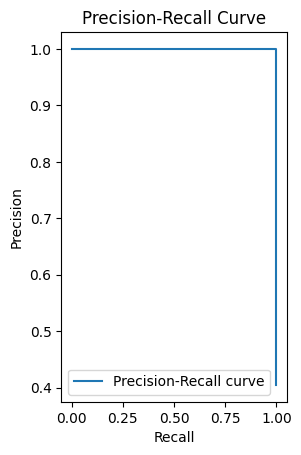

In [72]:
# Plot Precision-Recall curve
from sklearn.metrics import precision_recall_curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, model.predict(X_test_scaled))
plt.subplot(1, 2, 2)
plt.plot(recall_curve, precision_curve, label="Precision-Recall curve")
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

plt.show()

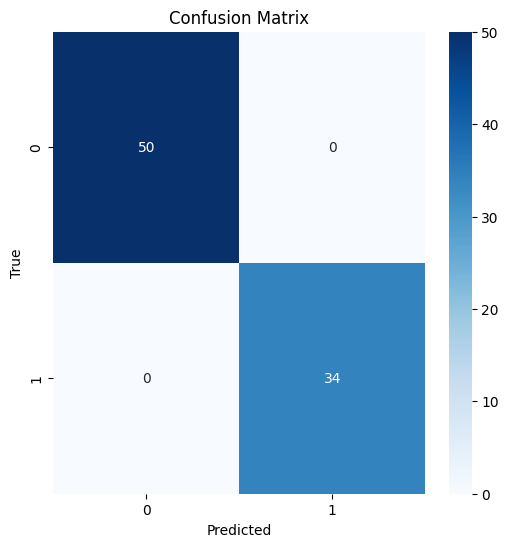

In [73]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [74]:
# Per Class Error Analysis
error = np.abs(y_test - y_pred.flatten())
per_class_error = pd.DataFrame({'True Values': y_test, 'Predicted': y_pred.flatten(), 'Error': error})
print(per_class_error.head())

     True Values  Predicted  Error
321            0          0      0
324            1          1      0
388            0          0      0
56             0          0      0
153            1          1      0


In [75]:
# Save the model and artifacts
wandb.save("model.h5")
model.save("model.h5")

In [76]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("brendan45774/test-file")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/brendan45774/test-file/versions/6
